<a href="https://colab.research.google.com/github/Lidivinekeng/Prediction_of_product_sales/blob/main/Project_1_Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prediction of product sales



*   Author : Lidivine Kengne



## project overview

predict the sale

# CODE


### Updating Scikit-Learn to V 1.1.3

In [1]:
## UPDATING SKLEARN ON COLAB
!pip install scikit-learn==1.1.3

from IPython.display import clear_output
clear_output()

import sklearn as sk
vers = !python --version
print(f"Python Vers: {vers[0]}")
print(f"Scikit-learn Vers: {sk.__version__}")

Python Vers: Python 3.10.12
Scikit-learn Vers: 1.1.3


In [98]:
# Importing a module from a GitHub repository using 'requests'
import os
import requests

# Raw URL of the file you want to import
raw_url = 'https://raw.githubusercontent.com/Lidivinekeng/data-viz-wk17-codealongs-life-expectancy/main/CODE/data_enrichment.py'

# Specify the local file name
local_filename = 'data_enrichment.py'

# Download the module using 'requests'
response = requests.get(raw_url)

# Check if the download was successful
if response.status_code == 200:
    with open(local_filename, 'wb') as file:
        file.write(response.content)
else:
    print("Failed to download the module.")

    %load_ext autoreload
%autoreload 2
import data_enrichment as de



In [66]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

##load and inspect data

### **Import Libraries**

In [5]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotlib
import matplotlib.pyplot as plt

## Preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration
from sklearn import set_config


from IPython.core.display import clear_output

import numpy as np

In [6]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['train_MAE','test_MAE',
             'train_RMSE', 'test_RMSE',
             'train_R2', 'test_R2']

  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[model_name])
  scores.loc[model_name, :] = [train_mae, test_mae,
                              train_rmse, test_rmse,
                              train_r2, test_r2]

  return scores

### **Notebook Defaults and Runtime Configurations**

##### **Warnings**

##### **Pandas Display Configurations**

In [8]:
## Display all columns
pd.set_option('display.max_column', None)

##### **MatPlotLib rcParams**

- **Customizing Matplotlib with style sheets and rcParams**

 - https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [9]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

### **Load the Data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df_prediction = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/project/sales_predictions_2023 (1).csv"
df = pd.read_csv(df_prediction)

##Separate your data into the feature matrix (X) and the target vector (y)

Define features (X) and target (y).

In [29]:
# Define features (X) and target (y).
# X should include every feature
# y should be 'Item_Identifier'

target = 'Item_Outlet_Sales'
X = df.drop(columns=[target , 'Item_Outlet_Sales'])
y = df[target]

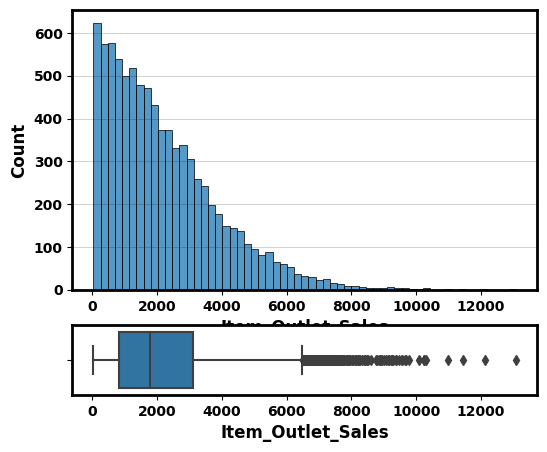

In [52]:
target = 'Item_Outlet_Sales'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=df, x=target,ax=axes[0])
sns.boxplot(data=df, x=target, ax=axes[1]);

##Train/test split the data. Please use the random number 42 for consistency

In [30]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

###.head()

In [31]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###.info()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


##clean data

1) How many rows and columns?

In [33]:
print (f'we have {len(df)}rows and {len(df.columns)}columns.')

we have 8523rows and 11columns.


2) What are the datatypes of each variable?

In [34]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) duplicates value

In [35]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

4) Identify missing values.

In [36]:
# Get the number of null values for all columns and save as a variable
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [37]:
# Save a list of object columns (Hint: select_dtypes)
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [40]:
# Remake the list of string columns
string_cols = df.select_dtypes("object").columns
string_cols
# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Fat_Content
low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value Counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Value Counts for Outlet_Location_

In [42]:
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64

In [43]:
# Replace "LF", "Low Fat"with "low fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"low fat", "Low Fat" :"low fat",})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64

In [45]:
# Replace "Regular", with "reg "
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"Regular":"reg"})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [46]:
df_num = df.select_dtypes(exclude= ['object'])

In [47]:
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [48]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Identify each feature as numerical, ordinal, or nominal.

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [51]:
# Checking object columns
X_train.select_dtypes('object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,low fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,reg,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,reg,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,low fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,low fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,reg,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,low fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,low fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [53]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.10.12
sklearn version: 1.1.3


In [54]:
## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [55]:
## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [57]:
## make the preprocessing column transformer
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7af10db3bcd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7af10db3b490>)])

In [58]:
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Fat_Content_low fat,pipeline-2__Item_Fat_Content_reg,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,pipeline-2__Item_Type_Dairy,pipeline-2__Item_Type_Frozen Foods,pipeline-2__Item_Type_Fruits and Vegetables,pipeline-2__Item_Type_Hard Drinks,pipeline-2__Item_Type_Health and Hygiene,pipeline-2__Item_Type_Household,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods,pipeline-2__Outlet_Identifier_OUT010,pipeline-2__Outlet_Identifier_OUT013,pipeline-2__Outlet_Identifier_OUT017,pipeline-2__Outlet_Identifier_OUT018,pipeline-2__Outlet_Identifier_OUT019,pipeline-2__Outlet_Identifier_OUT027,pipeline-2__Outlet_Identifier_OUT035,pipeline-2__Outlet_Identifier_OUT045,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Size_High,pipeline-2__Outlet_Size_MISSING,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
4776,16.350,0.029565,256.4646,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,15.250,0.000000,179.7660,2009.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,12.350,0.158716,157.2946,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,7.975,0.014628,82.3250,2004.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,19.350,0.016645,120.9098,2002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,0.286345,139.1838,1998.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,15.600,0.117575,75.6670,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,17.600,0.018944,237.3590,2002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,20.350,0.054363,117.9466,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
## make the preprocessing column transformer WITH CORRECT ARGS!
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,16.350,0.029565,256.4646,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,15.250,0.000000,179.7660,2009.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,12.350,0.158716,157.2946,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,7.975,0.014628,82.3250,2004.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,19.350,0.016645,120.9098,2002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,0.286345,139.1838,1998.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,15.600,0.117575,75.6670,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,17.600,0.018944,237.3590,2002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,20.350,0.054363,117.9466,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#Linear Regression

In [60]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True):
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))

    else:
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train,
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,847.13,"1,139.10"
Test,0.57,804.12,"1,092.86"


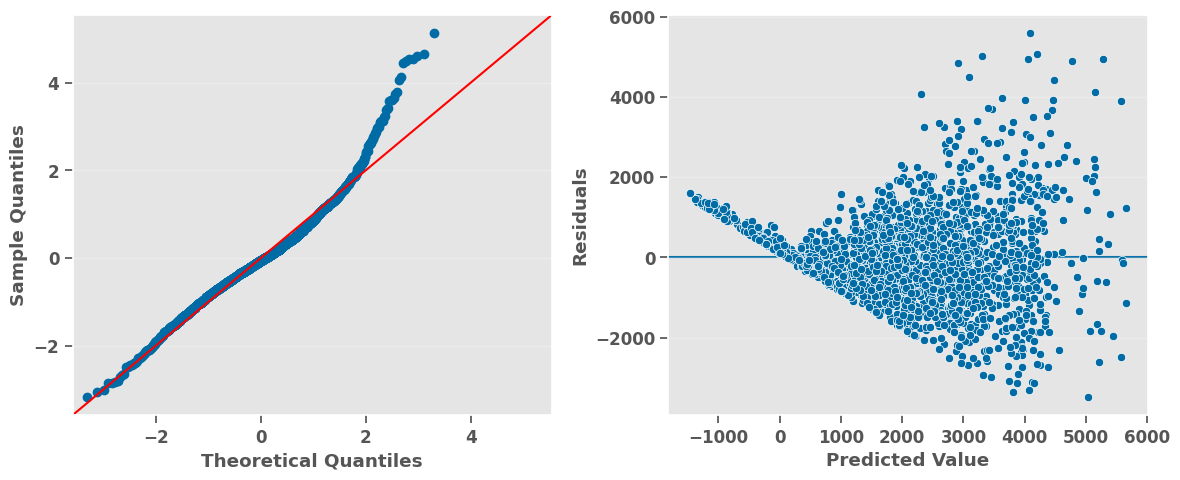

In [103]:
de.plot_residuals(lin_reg, X_test_df,y_test)


In [83]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [84]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                           -1.941817
Item_Visibility                     -423.390180
Item_MRP                              15.720924
Outlet_Establishment_Year            -15.270632
Item_Fat_Content_low fat             -31.312617
Item_Fat_Content_reg                  31.312617
Item_Type_Baking Goods               -18.612541
Item_Type_Breads                     -47.260859
Item_Type_Breakfast                   26.748523
Item_Type_Canned                       8.903654
Item_Type_Dairy                     -124.947555
Item_Type_Frozen Foods               -20.383167
Item_Type_Fruits and Vegetables       27.141489
Item_Type_Hard Drinks                 -4.717641
Item_Type_Health and Hygiene           8.412873
Item_Type_Household                  -13.102794
Item_Type_Meat                       -30.477427
Item_Type_Others                     -45.426266
Item_Type_Seafood                    308.888596
Item_Type_Snack Foods                -40.544933
Item_Type_Soft Drinks                -58

In [85]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [86]:
coeffs.sort_values()

Outlet_Type_Grocery Store           -895.8745
Outlet_Identifier_OUT019            -469.8095
Outlet_Identifier_OUT010            -426.0650
Item_Visibility                     -423.3902
Outlet_Location_Type_Tier 1         -252.7387
Outlet_Size_MISSING                 -247.6982
Item_Type_Dairy                     -124.9476
Outlet_Size_Small                   -106.3443
Outlet_Identifier_OUT049             -84.3111
Outlet_Identifier_OUT018             -82.5173
Outlet_Type_Supermarket Type2        -82.5173
Outlet_Identifier_OUT013             -67.3639
Outlet_Size_High                     -67.3639
Item_Type_Soft Drinks                -58.0983
Item_Type_Breads                     -47.2609
Item_Type_Others                     -45.4263
Item_Type_Snack Foods                -40.5449
Item_Fat_Content_low fat             -31.3126
Item_Type_Meat                       -30.4774
Item_Type_Frozen Foods               -20.3832
Outlet_Identifier_OUT045             -19.7674
Item_Type_Baking Goods            

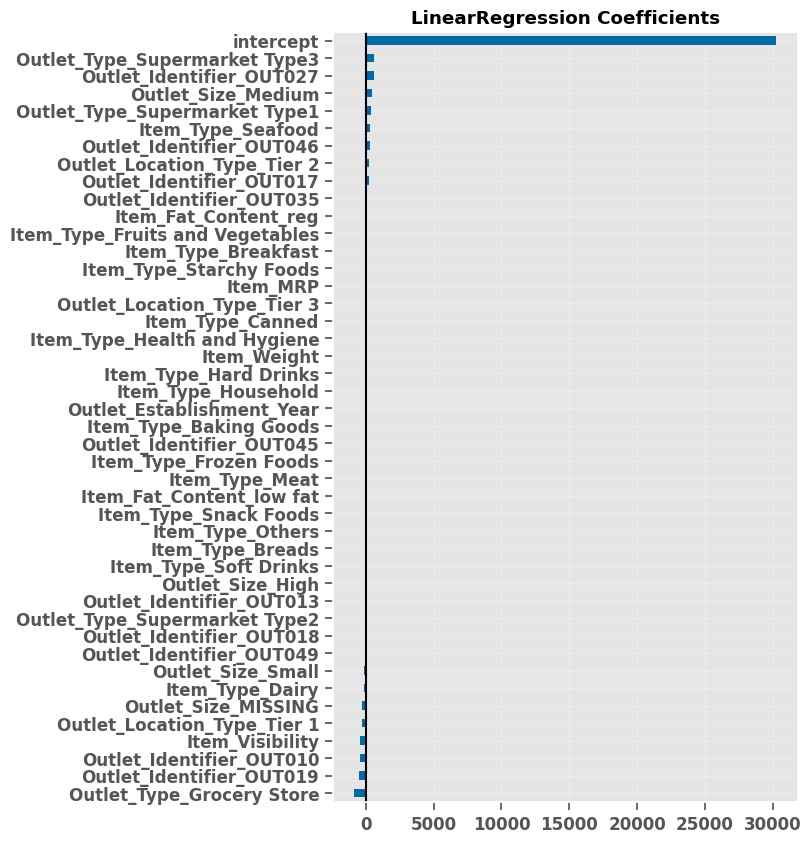

In [113]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');



In [114]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept                         44.0000
Outlet_Type_Grocery Store         43.0000
Outlet_Type_Supermarket Type3     42.0000
Outlet_Identifier_OUT027          41.0000
Outlet_Identifier_OUT019          40.0000
Outlet_Identifier_OUT010          39.0000
Item_Visibility                   38.0000
Outlet_Size_Medium                37.0000
Outlet_Type_Supermarket Type1     36.0000
Item_Type_Seafood                 35.0000
Outlet_Identifier_OUT046          34.0000
Outlet_Location_Type_Tier 1       33.0000
Outlet_Size_MISSING               32.0000
Outlet_Location_Type_Tier 2       31.0000
Outlet_Identifier_OUT017          30.0000
Item_Type_Dairy                   29.0000
Outlet_Size_Small                 28.0000
Outlet_Identifier_OUT049          27.0000
Outlet_Identifier_OUT018          26.0000
Outlet_Type_Supermarket Type2     25.0000
Outlet_Identifier_OUT013          24.0000
Outlet_Size_High                  23.0000
Outlet_Identifier_OUT035          22.0000
Item_Type_Soft Drinks             

In [116]:
top_n_features = coeff_rank.head(3)
top_n_features

intercept                       44.0000
Outlet_Type_Grocery Store       43.0000
Outlet_Type_Supermarket Type3   42.0000
dtype: float64

In [117]:
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

intercept                       30,277.4698
Outlet_Type_Grocery Store         -895.8745
Outlet_Type_Supermarket Type3      588.2348
dtype: float64

In [119]:
top_n = 3
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Type_Grocery Store         -895.8745
Outlet_Type_Supermarket Type3      588.2348
intercept                       30,277.4698
dtype: float64

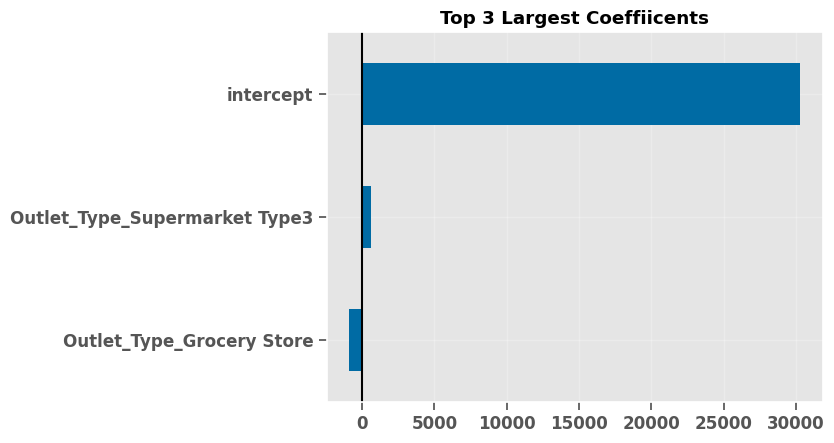

In [120]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

##The top 3 most impactful features, along with their coefficients, are:

- Outlet_Type_Grocery Store (Coefficient: -895.8745):

Interpretation: The negative coefficient for "Outlet_Type_Grocery Store" indicates that the presence of a grocery store type outlet has a significant negative impact on the predicted sales in 2023. For each unit increase in the presence of a grocery store type outlet (while holding all other factors constant), the expected sales decrease by approximately 895.8745 units. In plain English, this suggests that sales are substantially lower when a grocery store is involved.
- Outlet_Type_Supermarket Type3 (Coefficient: 588.2348):

Interpretation: The positive coefficient for "Outlet_Type_Supermarket Type3" suggests that the presence of a "Supermarket Type3" has a significant positive impact on the predicted sales in 2023. For each unit increase in the presence of a "Supermarket Type3" (while holding all other factors constant), the expected sales increase by approximately 588.2348 units. In simpler terms, having a "Supermarket Type3" outlet contributes significantly to higher sales.
- Intercept (Coefficient: 30,277.4698):

Interpretation: The intercept represents the baseline sales prediction when all other features are set to zero. In this context, the intercept value is 30,277.4698, indicating the expected sales in 2023 without considering specific features. It serves as a constant value added to the sales prediction.

#Tree-Based Model

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [166]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.94,296.71,426.62
Test,0.56,767.86,"1,105.30"


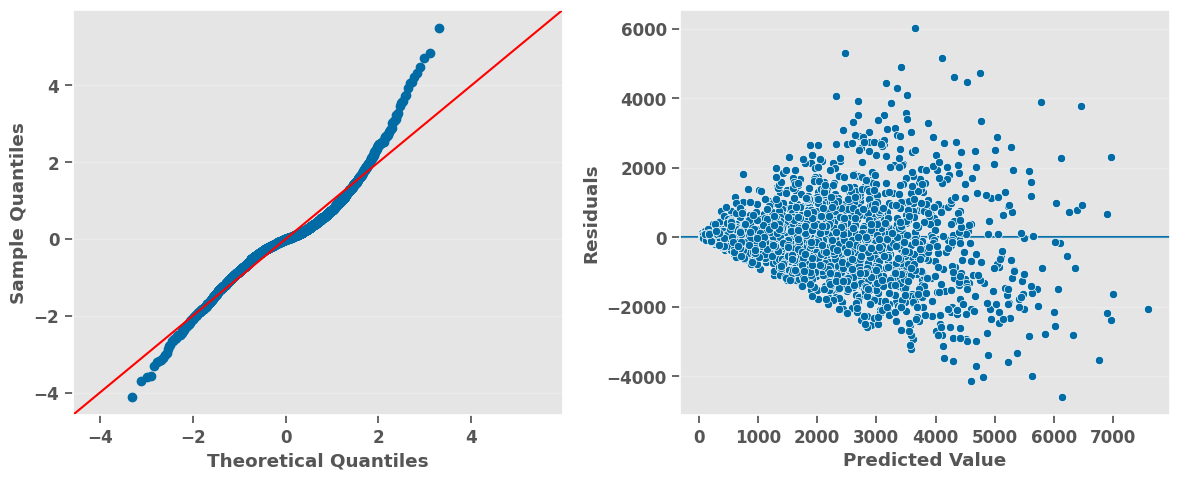

In [167]:
de.plot_residuals(reg, X_test_df,y_test)


In [175]:
importance_values = reg.feature_importances_
importance_values

array([5.29366201e-02, 9.80023411e-02, 4.40927722e-01, 2.83441311e-02,
       5.61853770e-03, 4.92385752e-03, 4.34382678e-03, 2.64718392e-03,
       2.87567219e-03, 4.32477070e-03, 6.50114012e-03, 5.86439727e-03,
       7.64368298e-03, 2.95610345e-03, 3.98576737e-03, 6.38231186e-03,
       3.75815790e-03, 1.60972191e-03, 1.82350674e-03, 8.44784417e-03,
       5.75029561e-03, 3.37873790e-03, 1.14404413e-05, 1.62988111e-03,
       3.34199237e-03, 1.18472915e-03, 1.09780432e-05, 3.17169569e-02,
       4.03014884e-03, 3.95239474e-03, 3.53431988e-03, 3.20082521e-03,
       1.49363774e-03, 2.80935624e-03, 2.80459358e-03, 4.13869039e-03,
       3.24651763e-03, 2.45458012e-03, 2.82387115e-03, 1.91709016e-01,
       1.63234058e-03, 1.06127079e-03, 3.01661289e-02])

In [169]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

43
43


True

In [178]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= reg.feature_names_in_,
                       name='Feature Importance')
importances

Item_Weight                       0.0529
Item_Visibility                   0.0980
Item_MRP                          0.4409
Outlet_Establishment_Year         0.0283
Item_Fat_Content_low fat          0.0056
Item_Fat_Content_reg              0.0049
Item_Type_Baking Goods            0.0043
Item_Type_Breads                  0.0026
Item_Type_Breakfast               0.0029
Item_Type_Canned                  0.0043
Item_Type_Dairy                   0.0065
Item_Type_Frozen Foods            0.0059
Item_Type_Fruits and Vegetables   0.0076
Item_Type_Hard Drinks             0.0030
Item_Type_Health and Hygiene      0.0040
Item_Type_Household               0.0064
Item_Type_Meat                    0.0038
Item_Type_Others                  0.0016
Item_Type_Seafood                 0.0018
Item_Type_Snack Foods             0.0084
Item_Type_Soft Drinks             0.0058
Item_Type_Starchy Foods           0.0034
Outlet_Identifier_OUT010          0.0000
Outlet_Identifier_OUT013          0.0016
Outlet_Identifie

In [179]:
importances.sum()


1.0

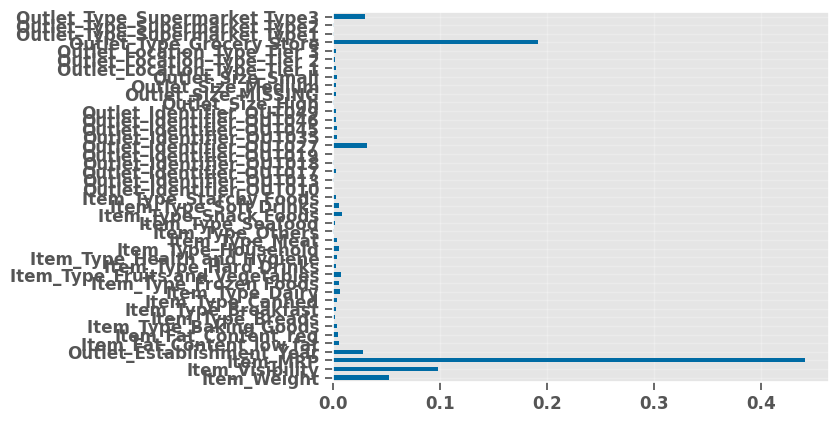

In [180]:
# plot importance
ax = importances.plot(kind='barh')


In [181]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

Item_MRP                          0.4409
Outlet_Type_Grocery Store         0.1917
Item_Visibility                   0.0980
Item_Weight                       0.0529
Outlet_Identifier_OUT027          0.0317
Outlet_Type_Supermarket Type3     0.0302
Outlet_Establishment_Year         0.0283
Item_Type_Snack Foods             0.0084
Item_Type_Fruits and Vegetables   0.0076
Item_Type_Dairy                   0.0065
Item_Type_Household               0.0064
Item_Type_Frozen Foods            0.0059
Item_Type_Soft Drinks             0.0058
Item_Fat_Content_low fat          0.0056
Item_Fat_Content_reg              0.0049
Item_Type_Baking Goods            0.0043
Item_Type_Canned                  0.0043
Outlet_Size_Small                 0.0041
Outlet_Identifier_OUT035          0.0040
Item_Type_Health and Hygiene      0.0040
Outlet_Identifier_OUT045          0.0040
Item_Type_Meat                    0.0038
Outlet_Identifier_OUT046          0.0035
Item_Type_Starchy Foods           0.0034
Outlet_Identifie

<Axes: >

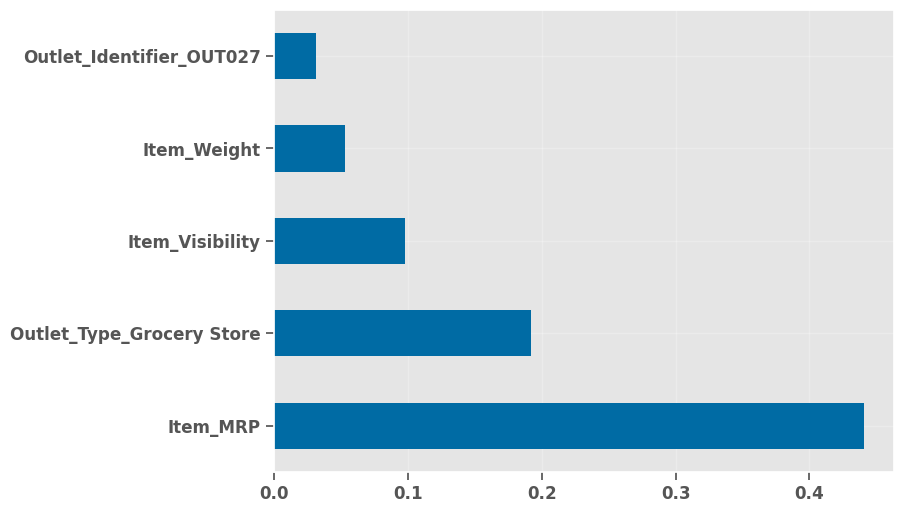

In [183]:
## just keep the top 10 importances and plot
sorted_importance.head(5).plot(kind='barh',
                                   figsize=(8,6))

In [184]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

Outlet_Identifier_OUT019          0.0000
Outlet_Identifier_OUT010          0.0000
Outlet_Type_Supermarket Type2     0.0011
Outlet_Identifier_OUT018          0.0012
Outlet_Size_High                  0.0015
Item_Type_Others                  0.0016
Outlet_Identifier_OUT013          0.0016
Outlet_Type_Supermarket Type1     0.0016
Item_Type_Seafood                 0.0018
Outlet_Location_Type_Tier 2       0.0025
Item_Type_Breads                  0.0026
Outlet_Size_Medium                0.0028
Outlet_Size_MISSING               0.0028
Outlet_Location_Type_Tier 3       0.0028
Item_Type_Breakfast               0.0029
Item_Type_Hard Drinks             0.0030
Outlet_Identifier_OUT049          0.0032
Outlet_Location_Type_Tier 1       0.0032
Outlet_Identifier_OUT017          0.0033
Item_Type_Starchy Foods           0.0034
Outlet_Identifier_OUT046          0.0035
Item_Type_Meat                    0.0038
Outlet_Identifier_OUT045          0.0040
Item_Type_Health and Hygiene      0.0040
Outlet_Identifie

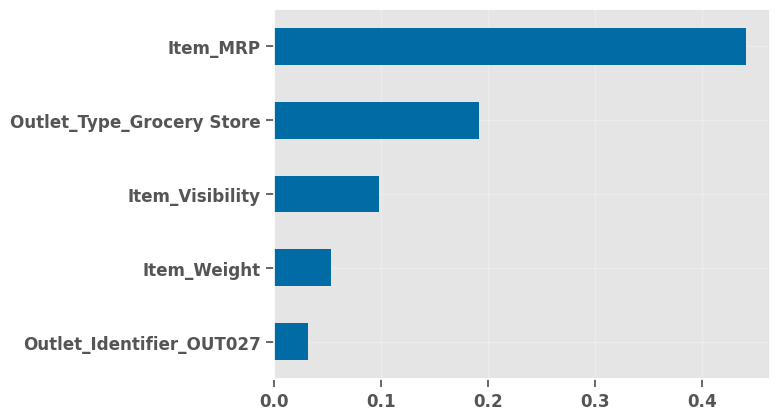

In [185]:
## just keep the top 10 importances and plot (that are now at the bottom of our series)
ax = sorted_importance.tail(5).plot(kind='barh')

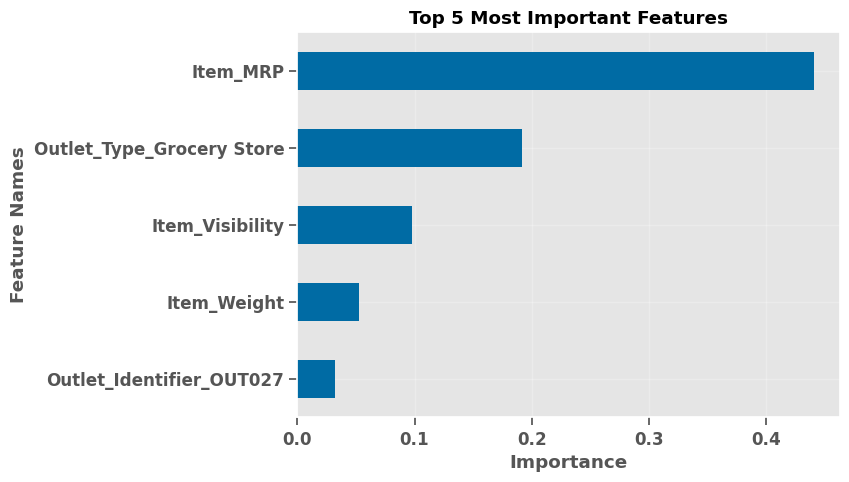

In [186]:
## plotting top 5 importances
ax = sorted_importance.tail(5).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 5 Most Important Features');


In [ ]:
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':rf_reg}
joblib.dump(export, 'random_forest_l01.joblib')

In [ ]:
best_models = {
    "preprocessor": preprocessor,
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test,
    "LinearRegression":lin_reg,
    "RandomForest": reg
}

In [192]:
# Create a dictionary to store the key-value pairs
best_models = {
    "preprocessor": preprocessor,
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test,
    'LinearRegression':lin_reg,
     'RandomForest': reg
}

In [193]:
# Save the dictionary to a joblib file
joblib.dump(best_models, "best-models.joblib")

['best-models.joblib']